# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [52]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
current_directory = os.getcwd() # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [53]:
df_Exp_rev = json_to_df(current_directory + '\\Results\\f1_d5_GA\\' + 'Exp_revenue.json')
df_RT_rev = json_to_df(current_directory + '\\Results\\f1_d5_GA\\' + 'RT_revenue.json')


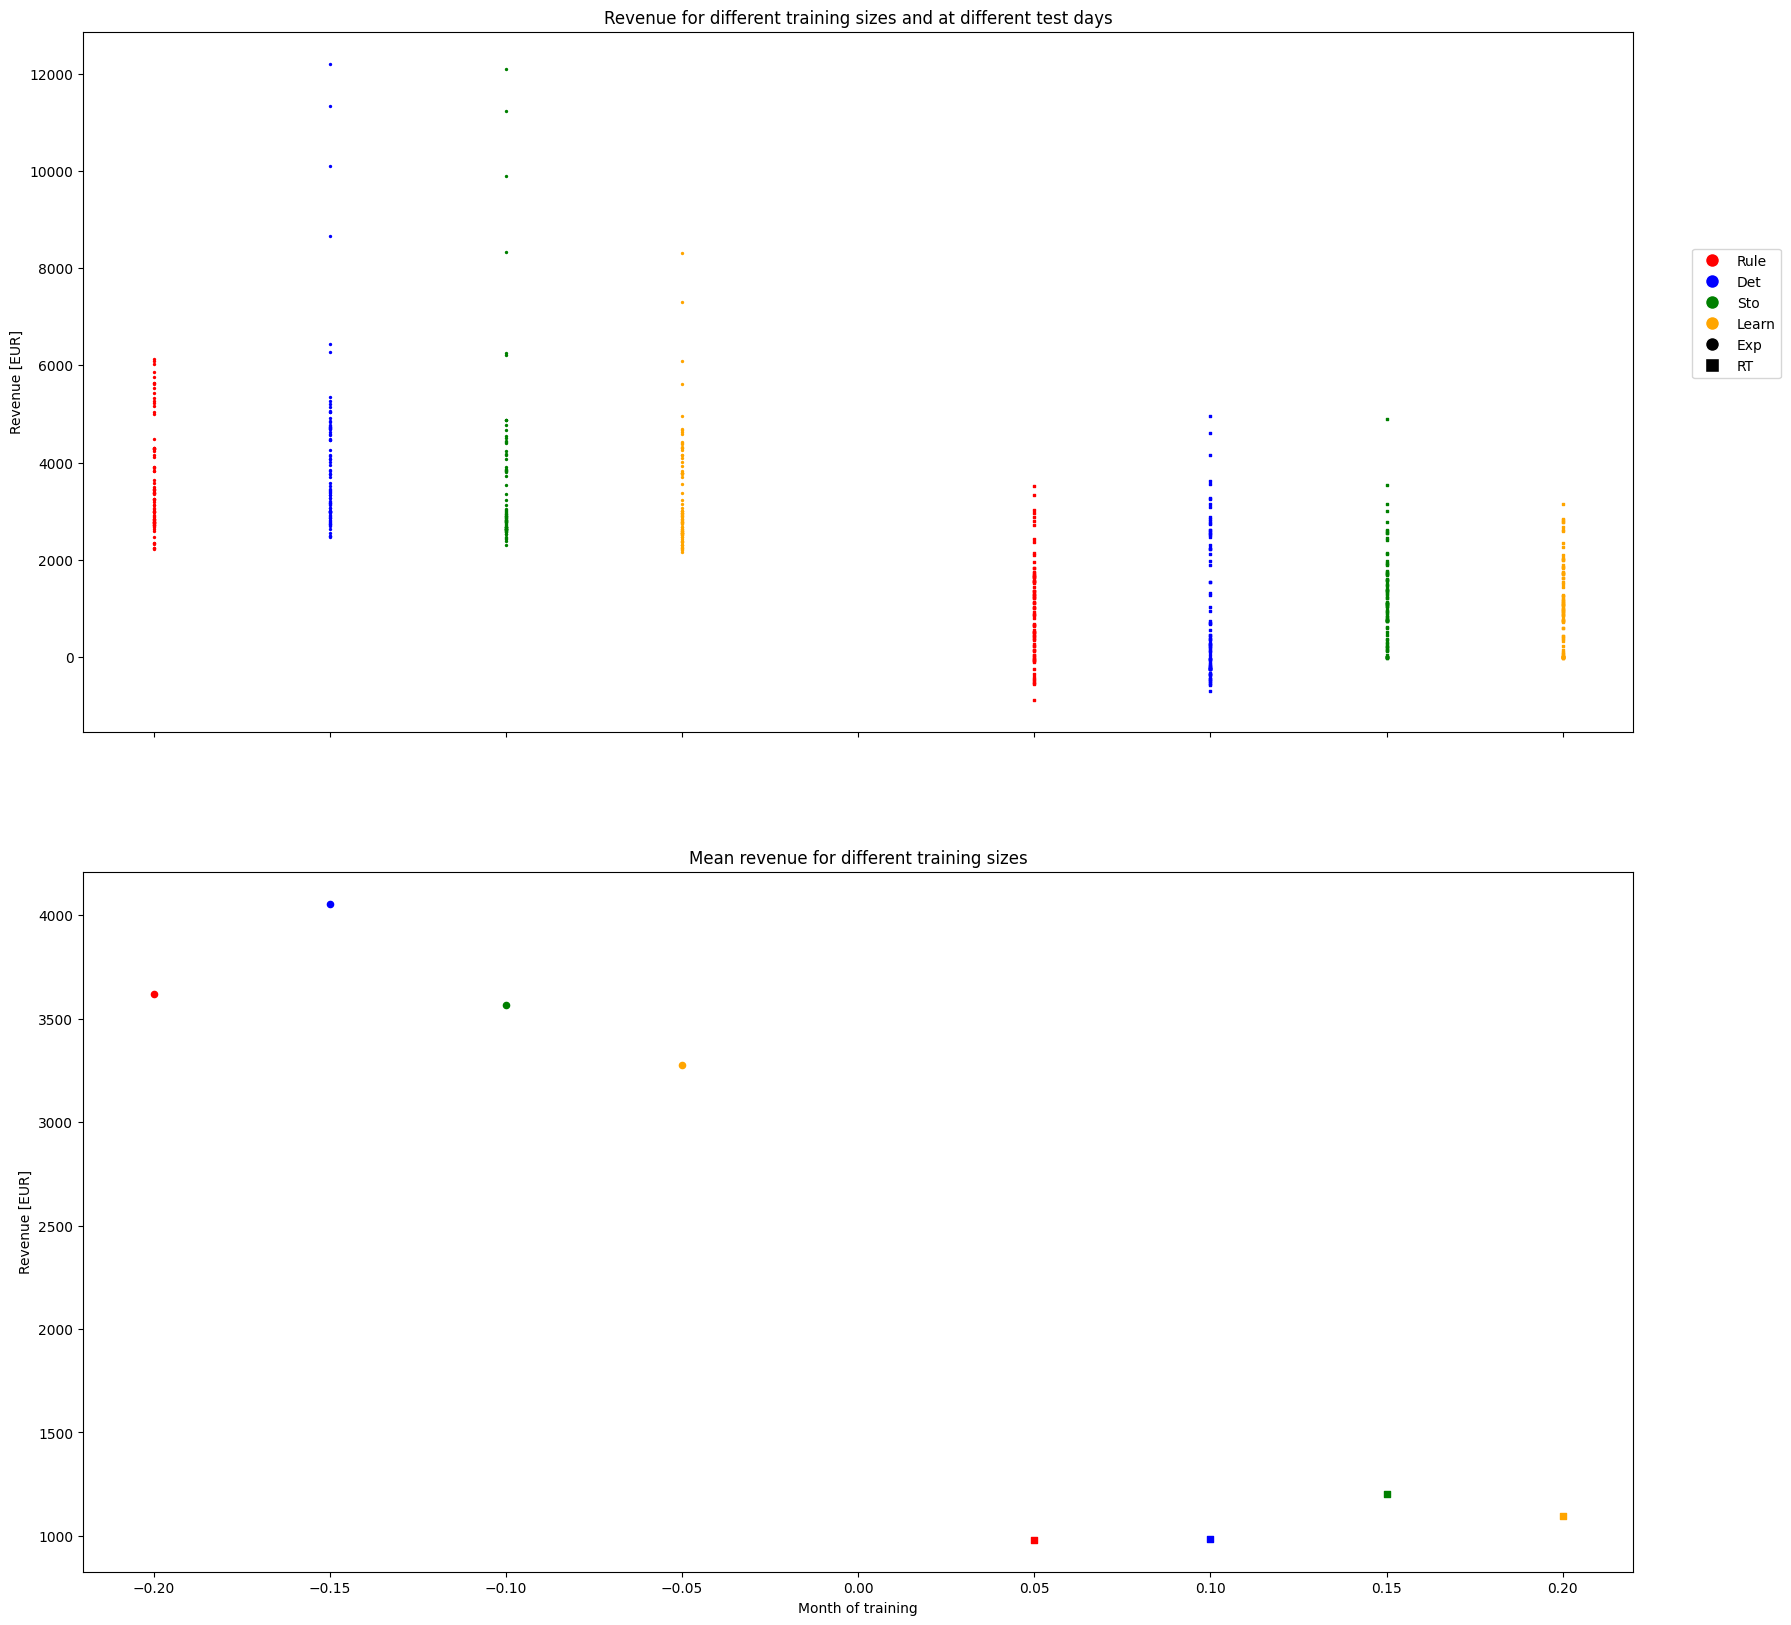

In [54]:
Array = Create_Array_from_Rev(df_Exp_rev,df_RT_rev)
plot_Revenue_Test(Array)

For a fixed day, see how the training size affects the results

In [55]:
d = 5
fixd0 = [f'f{1}_d{d}_upd{0}_t{1}' ]
fixd30 = [f'f{1}_d{d}_upd{30}_t{31}' ]
fixd60 = [f'f{1}_d{d}_upd{60}_t{61}' ]

                      sto         det      learn        rule
f1_d5_upd0_t1  184.289144  186.954806 -13.839917  450.411429


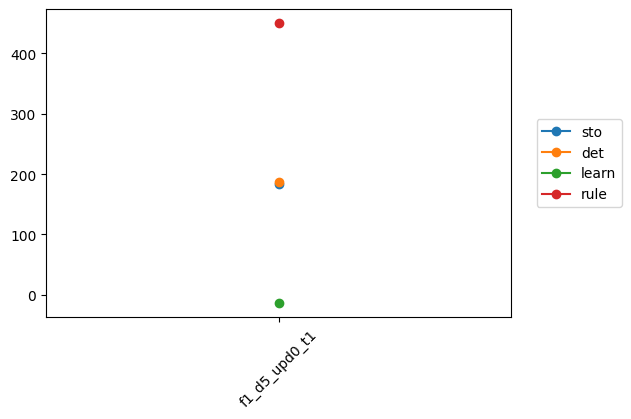

In [56]:
print(df_RT_rev[fixd0].T)
plt.figure(figsize=(6,4))
plt.plot(df_RT_rev[fixd0].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

                      sto         det       learn        rule
f1_d5_upd30_t31 -0.052273 -348.612062  10495.3044 -541.718592


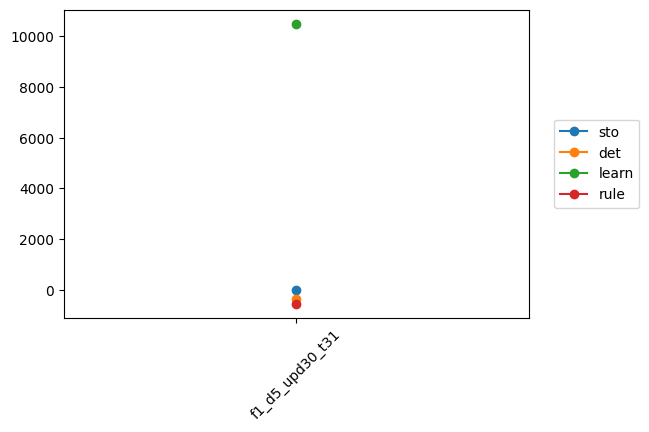

In [46]:
print(df_RT_rev[fixd30].T)
plt.figure(figsize=(6,4))
plt.plot(df_RT_rev[fixd30].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

                         sto         det        learn        rule
f1_d5_upd60_t61  1692.297277  751.521471  2515.300617  863.474136


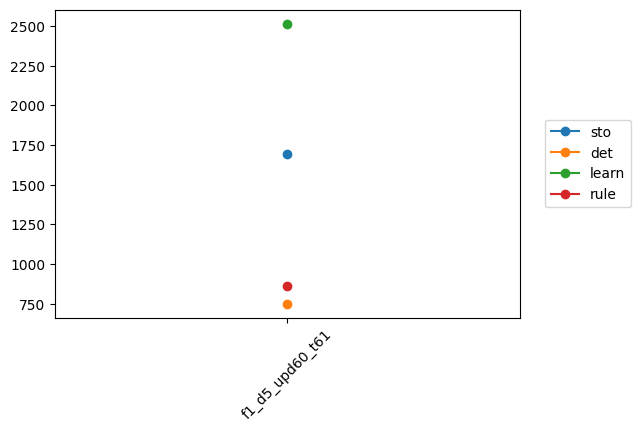

In [47]:
print(df_RT_rev[fixd60].T)
plt.figure(figsize=(6,4))
plt.plot(df_RT_rev[fixd60].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

For a fixed training size, see how the different days affects the results

In [48]:
fixd1 = [f'f{1}_d{5}_upd{d}_t{d+1}' for d in range(0,88)]
fixd6 = [f'f{1}_d{5}_upd{d}_t{d+1}' for d in range(0,88)]
fixd12 = [f'f{1}_d{5}_upd{d}_t{d+1}' for d in range(0,88)]

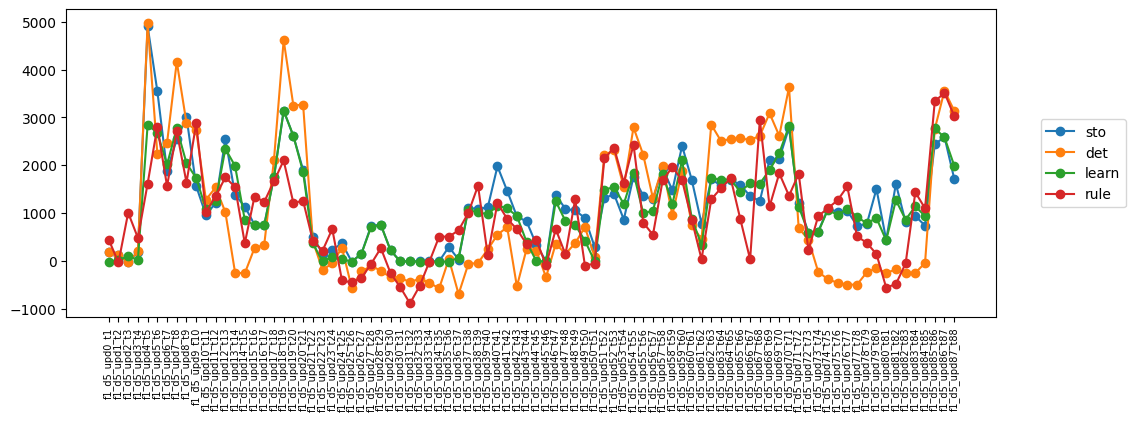

In [57]:
plt.figure(figsize=(12,4))
plt.plot(df_RT_rev[fixd1].T, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [50]:
df_RT_rev[fixd1].mean(axis=1)

sto       1201.874394
det        987.157765
learn    75151.602451
rule       980.863189
dtype: float64

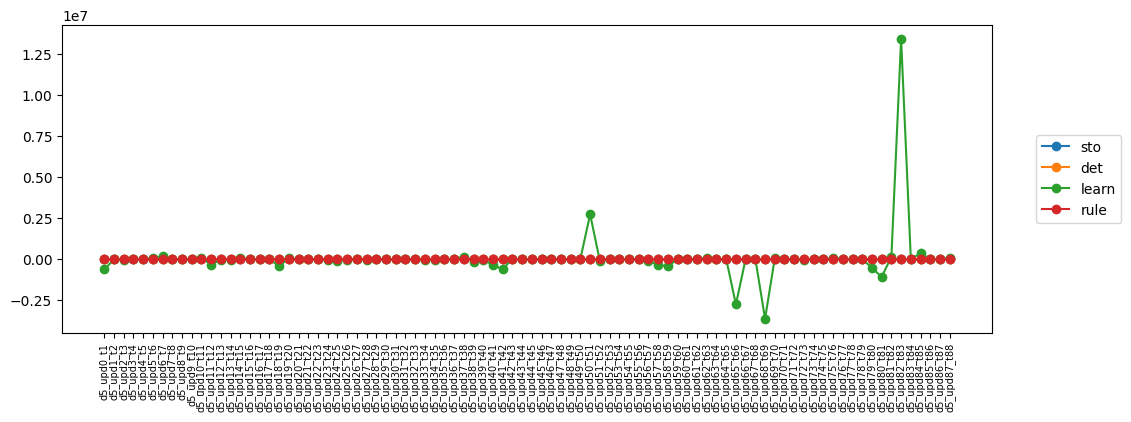

In [28]:
plt.figure(figsize=(12,4))
plt.plot(df_RT_rev[fixd6].T, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [29]:
df_RT_rev[fixd6].mean(axis=1)

sto       1201.874395
det        987.157765
learn    75151.602451
rule       980.863189
dtype: float64

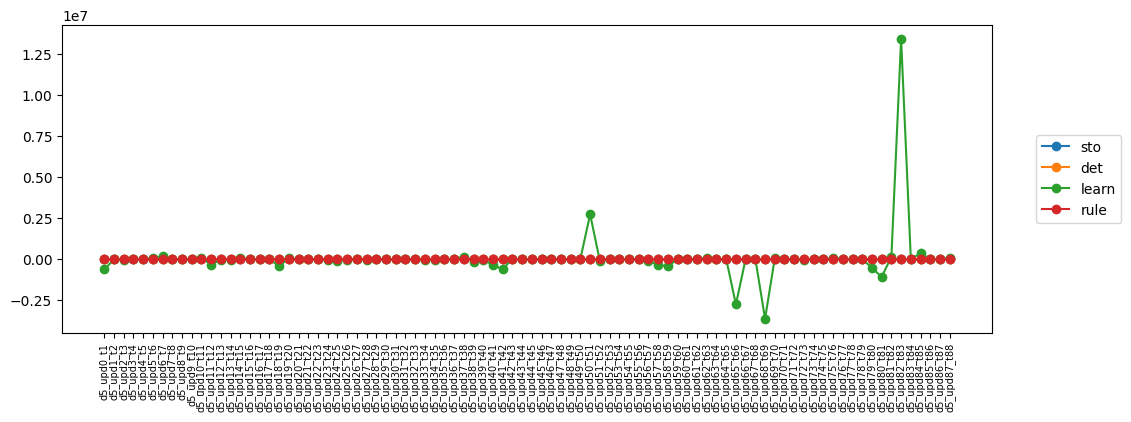

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df_RT_rev[fixd12].T, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [31]:
df_RT_rev[fixd12].mean(axis=1)

sto       1201.874395
det        987.157765
learn    75151.602451
rule       980.863189
dtype: float64

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT revenue
7) Battery dynamics

### Test case: d5 upd62 t63  
(Where deterministic model has a peak performance)

In [51]:
# Select plot parameters
choose_id = 'd5_upd62_t63'
save = True #True or False
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'Learn' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
results = save_plots(current_directory, choose_id, save, model, with_acceptance, rev_plot);

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Daniel  BV\\Desktop\\Thesis/Results/det_d5_upd62_t63.json'

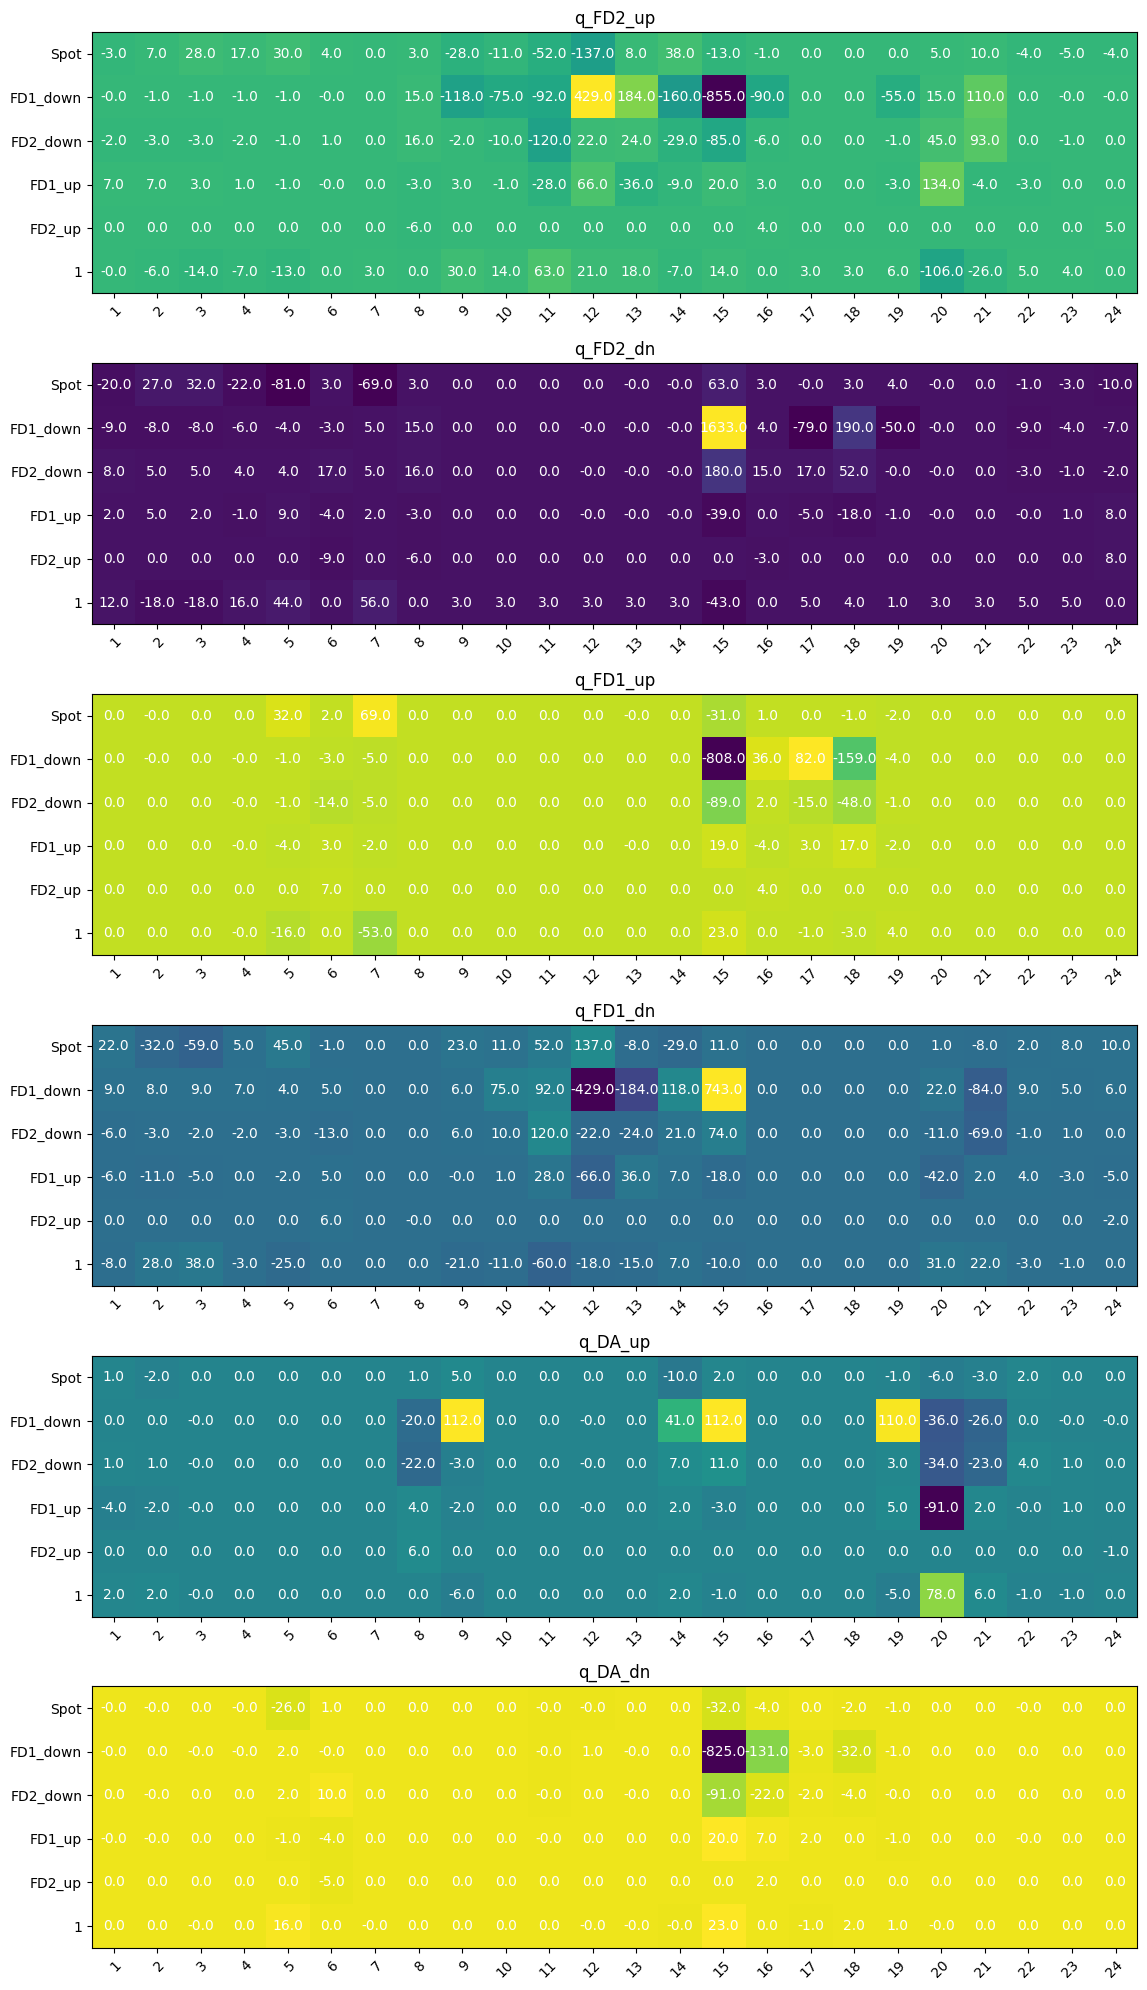

In [37]:
plot_coefficients_heatmap(results['Learn']['Bid'],save = True)
plt.show()

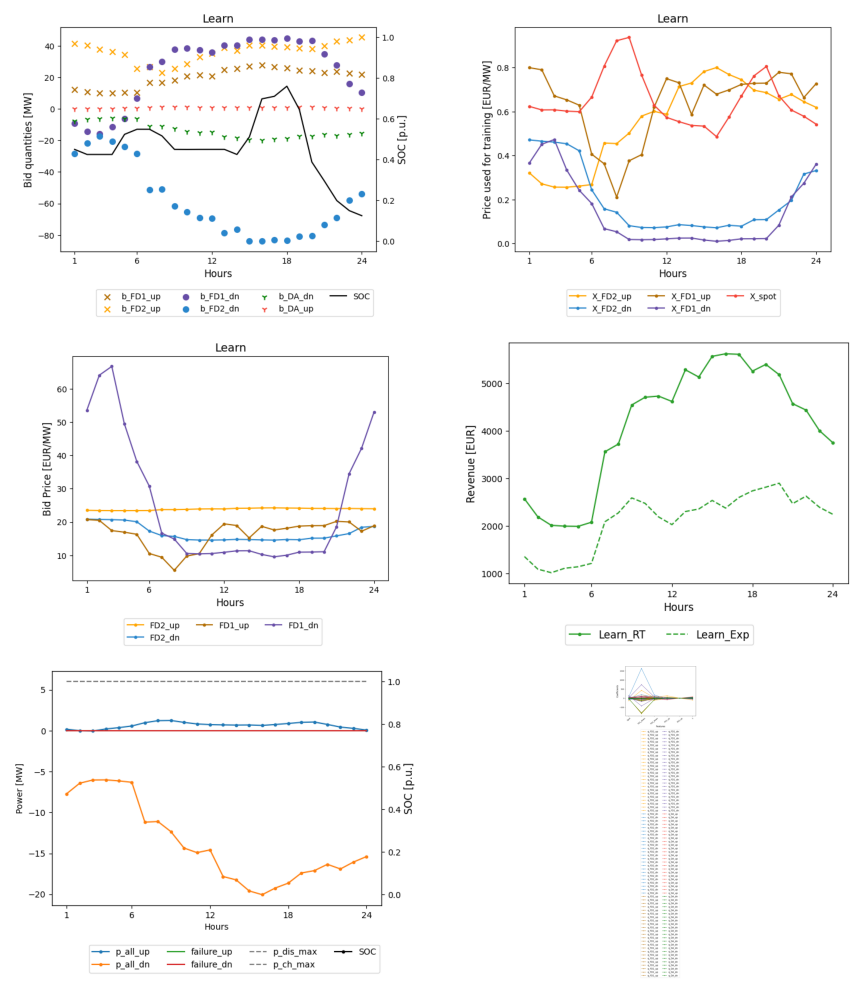

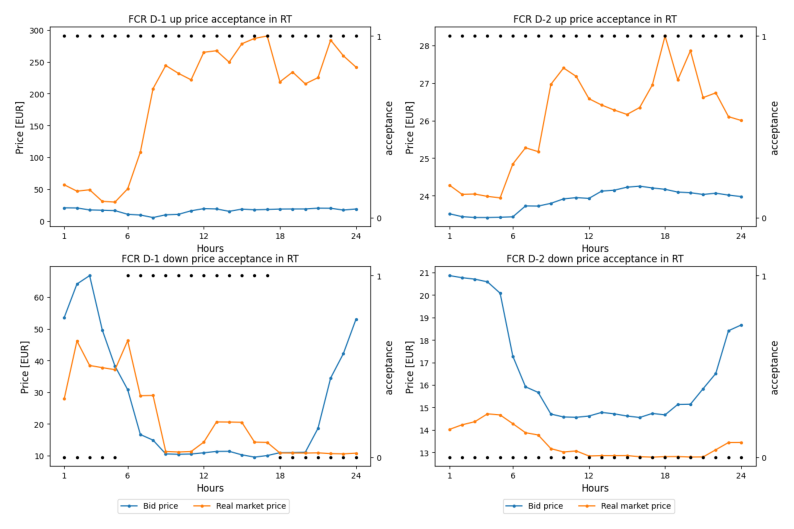

In [38]:
#View plots
view_plots(model, rev_plot)


Investigate why SOC in the last hour shoots up to 8 in the rule-based model

### Test case: M1 D9 t10 
Case when stochastic model performs the best

In [ ]:
# Select plot parameters
choose_id = 'm1_d9_t10'
save = True #True or False
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
save_plots(current_directory, choose_id, save, model, with_acceptance, rev_plot)

Test case:  m1_d9_t10
+----------+---------+-----------------+--------------+------------+
|          |    Rule |   Deterministic |   Stochastic |   Learning |
+==========+=========+=================+==============+============+
| RT       | 1353.16 |          5224.2 |      5642.15 |    4204.78 |
+----------+---------+-----------------+--------------+------------+
| Expected | 3626.02 |          5261.5 |      4934.97 |    4701.33 |
+----------+---------+-----------------+--------------+------------+


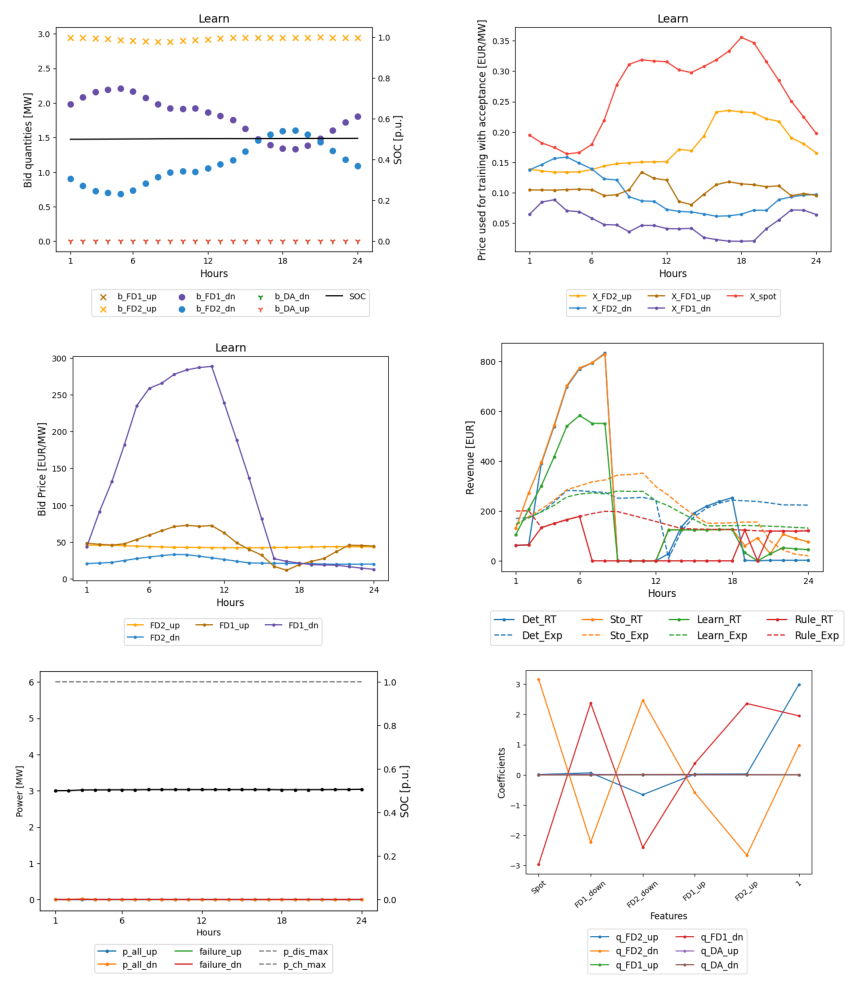

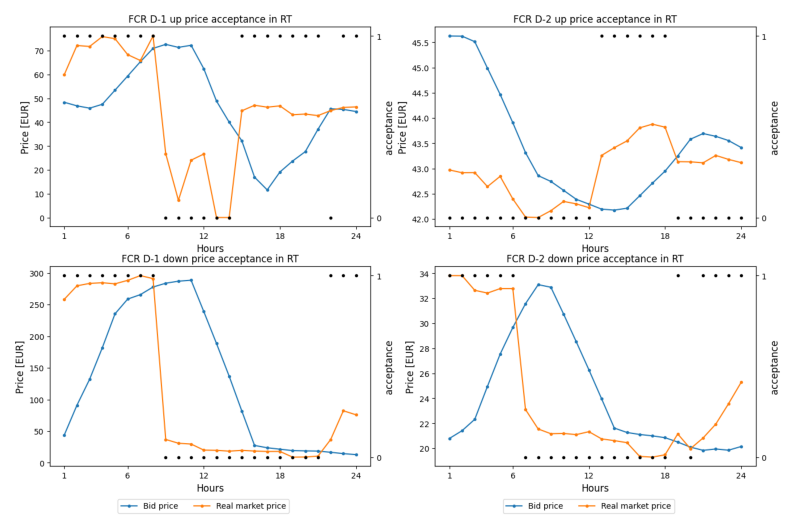

In [ ]:
#View plots
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
view_plots(model, rev_plot)

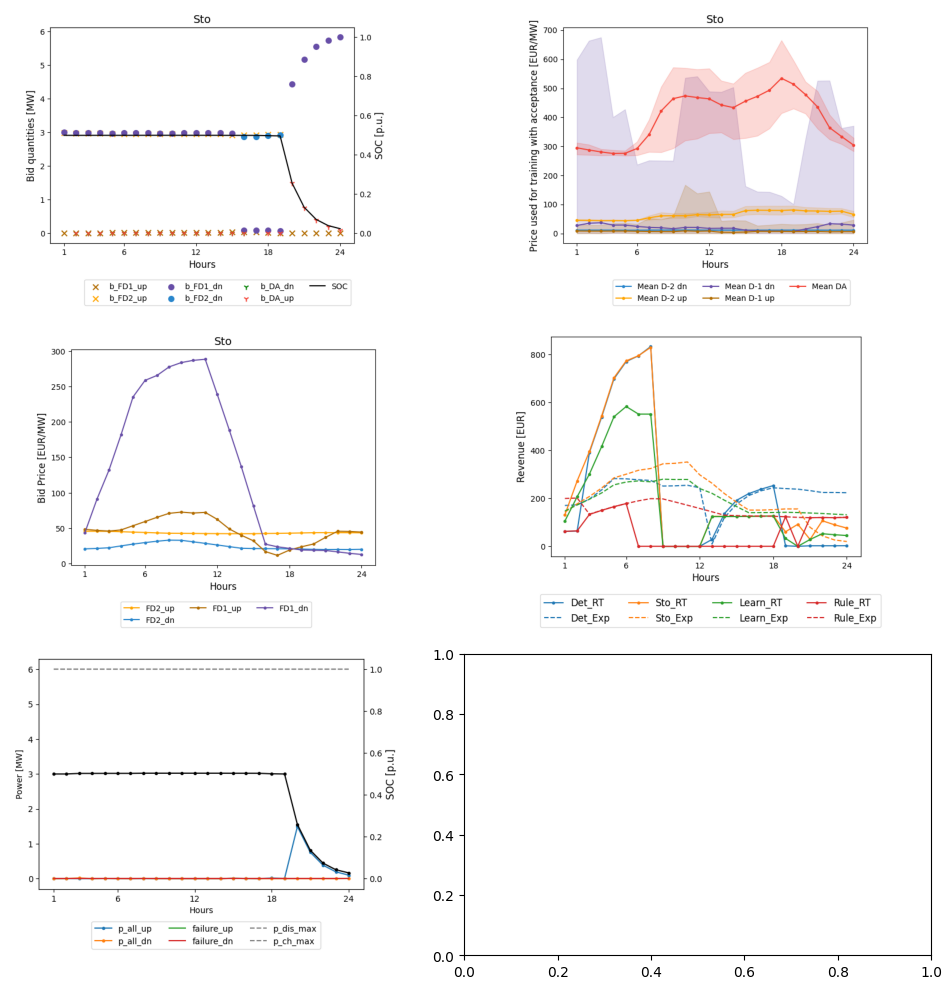

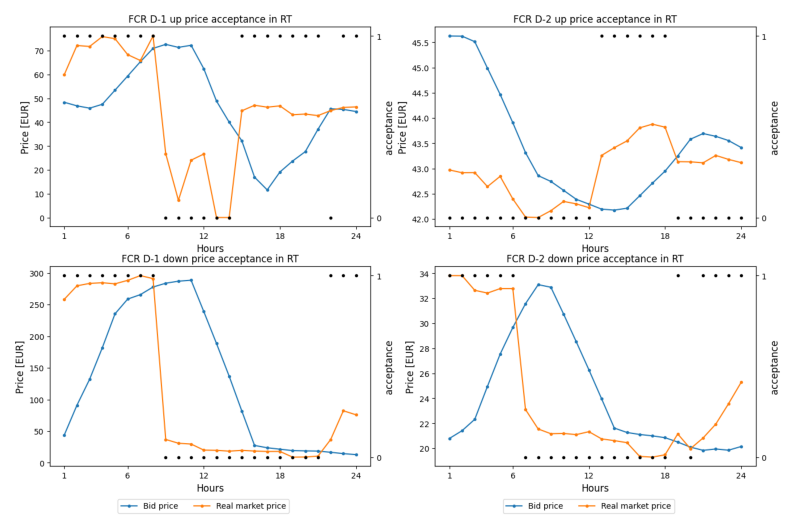

In [ ]:
#View plots
model = 'Sto' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
view_plots(model, rev_plot)